R Basics
-
Introductory Bioinformatics Sharifi Zarchi The practical sessions part 10
-
**ANOVA & some functions (subset, paste)**


1. File recall and initial preprocessing . . .

In [1]:
library(pheatmap)
library(ggplot2)
library(reshape)
library(grid)

x = read.delim("C:/Users/abolf/Desktop/jupyter train/intro bioinf sharifi practical/SharifiZarchi-bio/Data/Endoderm.txt")
rownames(x) = x[,1]
x = x[,-1]
x = log2(x+1)
x <- na.omit(x)
dim(x)
head(x)

Warning message:
"package 'pheatmap' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'reshape' was built under R version 4.3.3"


[1] 50  9

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768


2. more preprocessing and some testing

In [2]:
x$Sample <- substr(rownames(x), 1, nchar(rownames(x)) -2 )
head(x)

y <- x[, c("HLXb9", "Sample")]
y
# q : does this gene has a significant difference in all of the samples with each other?
# s: anova

# q : does this gene have a significant difference in 2 samples?
# s : t-test

t.test(y[y$Sample == "SC", 1], y[y$Sample == "DE", 1])

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000,SC
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,SC
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,SC
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570,DE
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640,DE
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768,DE


,HLXb9,Sample
,<dbl>,<chr>
SC.1,1.709291,SC
SC.2,1.000000,SC
SC.3,1.000000,SC
DE-1,7.073606,DE
DE-2,5.559798,DE
DE-3,5.725469,DE
DE-4,7.150661,DE
DE+1,7.402842,DE
DE+2,6.678072,DE



	Welch Two Sample t-test

data:  y[y$Sample == "SC", 1] and y[y$Sample == "DE", 1]
t = -14.832, df = 6.9879, p-value = 1.542e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.313059 -4.576328
sample estimates:
mean of x mean of y 
 1.236430  6.681124 


3. intro Subset function ...

In [3]:
subset(y, Sample == "SC")
subset(y, Sample == "DE")
subset(y, Sample == "SC")[,1]
subset(y, Sample == "DE")[,1]

#rows that their hlxb9 is more than double of pdx1
subset(x, HLXb9 > 2*PDX1)

t.test(subset(x, Sample == "SC")[,1], subset(x, Sample == "DE")[,1])


,HLXb9,Sample
,<dbl>,<chr>
SC.1,1.709291,SC
SC.2,1.000000,SC
SC.3,1.000000,SC


,HLXb9,Sample
,<dbl>,<chr>
DE-1,7.073606,DE
DE-2,5.559798,DE
DE-3,5.725469,DE
DE-4,7.150661,DE
DE+1,7.402842,DE
DE+2,6.678072,DE
DE+3,7.177420,DE


[1] 1.709291 1.000000 1.000000

[1] 7.073606 5.559798 5.725469 7.150661 7.402842 6.678072 7.177420

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
DE+1,7.402842,3.589763,5.460415,5.358607,2.347666,2.087463,1.883621,2.321928,2.817623,DE
DE+3,7.177420,4.753818,3.542258,5.547203,4.919340,2.405992,2.247928,2.629939,2.538538,DE



	Welch Two Sample t-test

data:  subset(x, Sample == "SC")[, 1] and subset(x, Sample == "DE")[, 1]
t = -14.832, df = 6.9879, p-value = 1.542e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.313059 -4.576328
sample estimates:
mean of x mean of y 
 1.236430  6.681124 


4. intro Paste function & mixing with some previous functions that we learned

In [4]:
alaki <- data.frame(gene = paste("gene", 1:100), FC = runif(100, min =0, max = 10))
alaki

paste("hello", "world")
paste(1:10, "s")

runif(100, min = 0, max = 10)

alaki
subset(alaki, FC >2)
subset(alaki, FC <= 2)
subset(alaki, FC >2)

alaki <- data.frame(gene = paste("gene", 1:100), FC = runif(100, min =-10, max = 10))
subset(alaki, abs(FC) > 5)


gene,FC
<chr>,<dbl>
gene 1,8.7930707
gene 2,4.2962020
gene 3,7.0164505
gene 4,5.1150350
gene 5,4.2943554
gene 6,6.0333830
gene 7,7.7390241
gene 8,0.9512192
gene 9,0.8668244


[1] "hello world"

[1] "1 s"  "2 s"  "3 s"  "4 s"  "5 s"  "6 s"  "7 s"  "8 s"  "9 s"  "10 s"

[1] 5.6217726 8.8010659 1.7883580 0.2793471 3.0262494 6.9253747 4.7341695
  [8] 9.4714169 0.4297675 5.8067469 8.4199797 6.5815152 8.6696958 8.3462042
 [15] 7.2909288 8.9698687 2.6241007 2.5714791 8.0629069 5.8859064 6.0545923
 [22] 2.4573258 3.2067765 3.8089594 8.5421985 5.1839781 8.9951034 1.4601905
 [29] 7.3080232 8.2501679 4.9939779 9.8191458 7.4770171 8.9381815 4.6939701
 [36] 1.0401652 0.8316852 1.8812272 8.9926661 4.8414697 1.3810312 5.3848150
 [43] 5.1439836 8.4281152 9.3008362 4.1747413 2.4837162 6.8810245 0.5830402
 [50] 4.4255493 9.2181585 5.4532294 3.8925933 2.4888147 7.9179797 6.7281003
 [57] 9.7874198 1.9411283 1.4359564 2.1123327 6.7425583 3.8716851 7.9664501
 [64] 6.2862799 0.2091494 4.2685491 0.3634589 2.5870598 7.0965854 9.3579515
 [71] 8.8581416 8.1135553 6.9587116 6.2300812 2.6794681 8.6902014 6.0533090
 [78] 8.3444689 6.2558781 9.5218344 3.8135231 2.5762750 5.0685733 9.3048326
 [85] 5.1160571 9.2315573 4.3098656 0.2714641 1.2769053 3.6513465 3.8471822
 [92] 6.2886425 3.0184924 3.1597655 6.1984769 7.8927445 3.5778135 1.9664461
 [99] 4.6487884 2.6905994

gene,FC
<chr>,<dbl>
gene 1,8.7930707
gene 2,4.2962020
gene 3,7.0164505
gene 4,5.1150350
gene 5,4.2943554
gene 6,6.0333830
gene 7,7.7390241
gene 8,0.9512192
gene 9,0.8668244


,gene,FC
,<chr>,<dbl>
1,gene 1,8.793071
2,gene 2,4.296202
3,gene 3,7.016450
4,gene 4,5.115035
5,gene 5,4.294355
6,gene 6,6.033383
7,gene 7,7.739024
10,gene 10,5.959164
11,gene 11,2.603203


,gene,FC
,<chr>,<dbl>
8,gene 8,0.9512192
9,gene 9,0.8668244
33,gene 33,1.6888943
37,gene 37,0.3681444
41,gene 41,1.3496778
48,gene 48,0.4201403
50,gene 50,1.7033755
56,gene 56,1.7315294
57,gene 57,1.1858466


,gene,FC
,<chr>,<dbl>
1,gene 1,8.793071
2,gene 2,4.296202
3,gene 3,7.016450
4,gene 4,5.115035
5,gene 5,4.294355
6,gene 6,6.033383
7,gene 7,7.739024
10,gene 10,5.959164
11,gene 11,2.603203


,gene,FC
,<chr>,<dbl>
1,gene 1,7.861571
2,gene 2,5.827615
3,gene 3,-9.912715
5,gene 5,-6.066990
7,gene 7,5.900461
8,gene 8,-8.475719
14,gene 14,8.932196
15,gene 15,-8.324908
16,gene 16,8.465218


5. checking data variances

In [5]:
var(subset(x, Sample == "SC")[,1])
var(subset(x, Sample == "DE")[,1])


[1] 0.1676977

[1] 0.5520587

6. finally lets go for ANOVA 

In [6]:
y

a <- aov(HLXb9 ~ Sample, y)
# line above == how much does Hlxb9 performance influenced by changing samples?
# ~ == based on
a
# still we want to get the f-value and then our p-value 

anova(a)

# we could do this all in a one line code
anova(aov(HLXb9 ~ Sample, x))
anova(aov(PDX1 ~ Sample, x))

,HLXb9,Sample
,<dbl>,<chr>
SC.1,1.709291,SC
SC.2,1.000000,SC
SC.3,1.000000,SC
DE-1,7.073606,DE
DE-2,5.559798,DE
DE-3,5.725469,DE
DE-4,7.150661,DE
DE+1,7.402842,DE
DE+2,6.678072,DE


Call:
   aov(formula = HLXb9 ~ Sample, data = y)

Terms:
                   Sample Residuals
Sum of Squares  112.59752  15.56989
Deg. of Freedom         7        42

Residual standard error: 0.608861
Estimated effects may be unbalanced

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,7,112.59752,16.0853601,43.39049,3.245598e-17
Residuals,42,15.56989,0.3707117,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,7,112.59752,16.0853601,43.39049,3.245598e-17
Residuals,42,15.56989,0.3707117,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,7,187.63659,26.8052268,40.64441,1.05828e-16
Residuals,42,27.69925,0.6595059,NA,NA


7. working with ANOVAs data

In [7]:
alaki = anova(aov(PDX1 ~ Sample, x))
# Pr(>F) is a data within our anova which contains the p-value
alaki$`Pr(>F)` 

dim(alaki)
alaki

# another ways to check the p-value directly
alaki[1,5]
anova(aov(PDX1 ~ Sample, x))[1, 5]

[1] 1.05828e-16          NA

[1] 2 5

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sample,7,187.63659,26.8052268,40.64441,1.05828e-16
Residuals,42,27.69925,0.6595059,NA,NA


[1] 1.05828e-16

[1] 1.05828e-16

8. lets  make a function to do the anova for all genes 

In [15]:

#it makes some problem, think
#AOV <- function(Gene){
#  anova(aov(Gene ~ Sample, y))[1, 5]
#}

AOV <- function(Gene){
  y <- x[, c(Gene, "Sample")]
  colnames(y)[1] = "Gene"
  anova(aov(Gene ~ Sample, y))[1, 5]
}

#better understanding:

Gene = "HLXb9"
y <- x[, c( Gene, "Sample")]
head(y)
colnames(y)[1] = "Gene"
head(y)

AOV("HLXb9")

,HLXb9,Sample
,<dbl>,<fct>
SC.1,1.709291,SC
SC.2,1.000000,SC
SC.3,1.000000,SC
DE-1,7.073606,DE
DE-2,5.559798,DE
DE-3,5.725469,DE


,Gene,Sample
,<dbl>,<fct>
SC.1,1.709291,SC
SC.2,1.000000,SC
SC.3,1.000000,SC
DE-1,7.073606,DE
DE-2,5.559798,DE
DE-3,5.725469,DE


[1] 3.245598e-17

9. we wanted to do this function for all genes in a 1 line code (sapply is a good tool for that)

In [9]:

genes <- colnames(x)
genes
print("-----------------------------------------------------------------------------------------------------------------------------")

# the word "sample" is redundant
genes <- genes[genes != "Sample"]
genes
print("-----------------------------------------------------------------------------------------------------------------------------")

#or
genes <- colnames(x)
genes <- genes[-length(genes)]
genes

sapply(genes, AOV)

[1] "HLXb9"   "HHEX"    "HNF4a"   "ISL1"    "NEUROD1" "NKX6.1"  "PAX4"   
 [8] "PTF1a"   "PDX1"    "Sample"

[1] "HLXb9"   "HHEX"    "HNF4a"   "ISL1"    "NEUROD1" "NKX6.1"  "PAX4"   
[8] "PTF1a"   "PDX1"

[1] "HLXb9"   "HHEX"    "HNF4a"   "ISL1"    "NEUROD1" "NKX6.1"  "PAX4"   
[8] "PTF1a"   "PDX1"

HLXb9         HHEX        HNF4a         ISL1      NEUROD1       NKX6.1 
3.245598e-17 2.092179e-25 3.235139e-16 4.208640e-15 4.880899e-19 1.211814e-12 
        PAX4        PTF1a         PDX1 
4.368176e-11 1.617548e-03 1.058280e-16

10. have some questions about anova?

In [10]:
?aov

aov {stats},R Documentation
formula,A formula specifying the model.
data,"A data frame in which the variables specified in the formula will be found. If missing, the variables are searched for in the standard way."
projections,Logical flag: should the projections be returned?
qr,Logical flag: should the QR decomposition be returned?
contrasts,"A list of contrasts to be used for some of the factors in the formula. These are not used for any Error term, and supplying contrasts for factors only in the Error term will give a warning."
...,"Arguments to be passed to lm, such as subset or na.action. See ‘Details’ about weights."


11.  a baxplot of our interseted gene from anova analysis

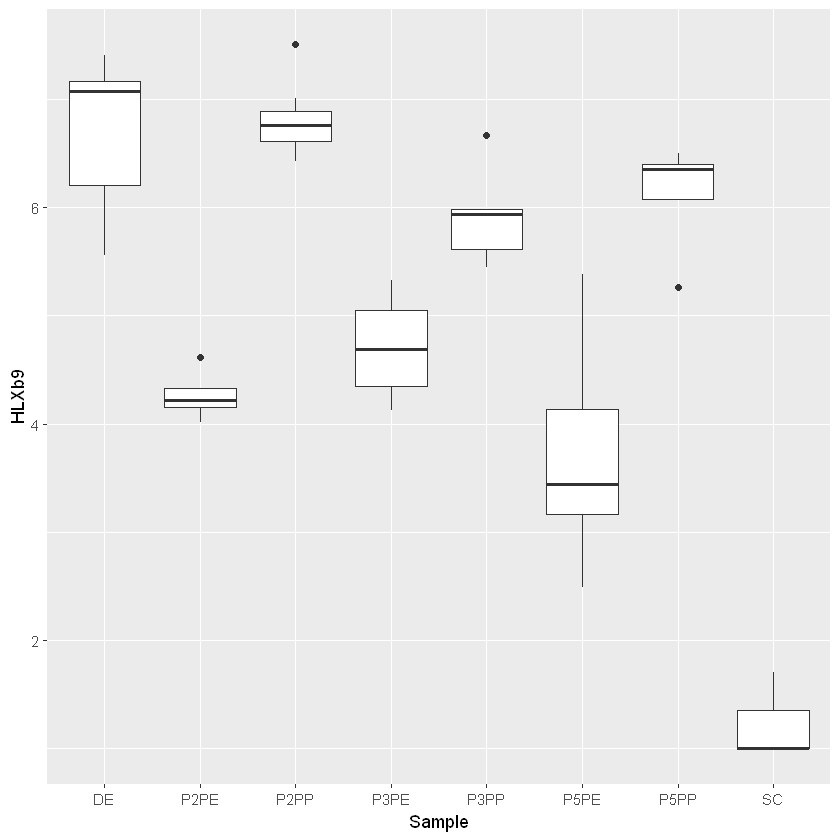

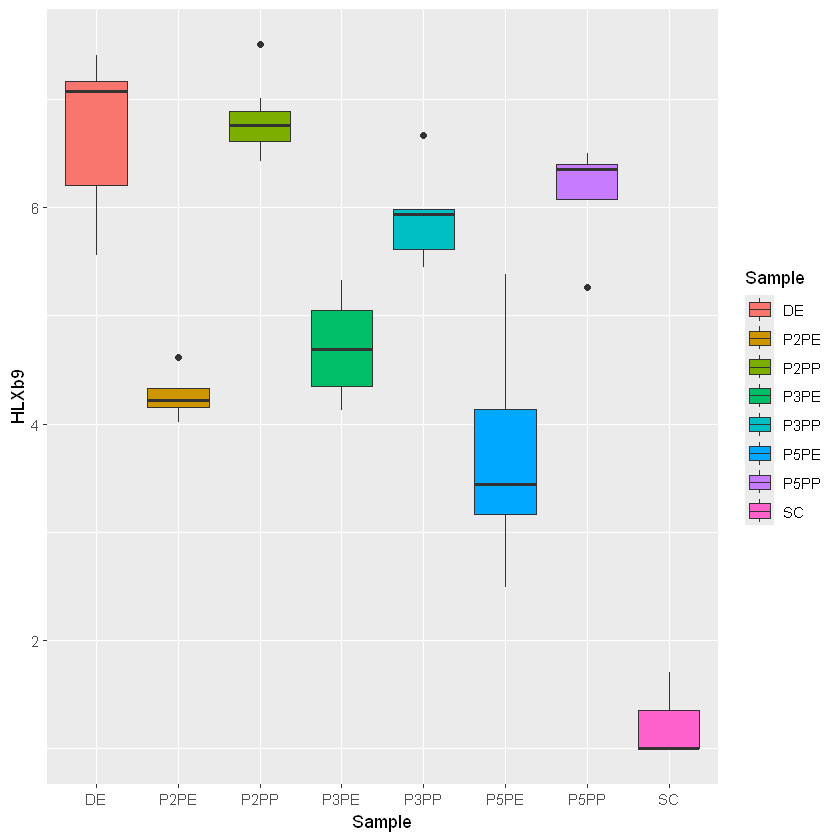

In [11]:

ggplot(x, aes(Sample, HLXb9)) + geom_boxplot()
ggplot(x, aes(Sample, HLXb9, fill = Sample)) + geom_boxplot()


12. how to order the graphs datas like the original data frame?

[1] SC   SC   SC   DE   DE   DE   DE   DE   DE   DE   P2PP P2PP P2PP P2PP P2PP
[16] P2PP P2PP P2PE P2PE P2PE P2PE P2PE P2PE P2PE P2PE P3PP P3PP P3PP P3PP P3PP
[31] P3PE P3PE P3PE P3PE P3PE P3PE P3PE P3PE P5PP P5PP P5PP P5PP P5PE P5PE P5PE
[46] P5PE P5PE P5PE P5PE P5PE
Levels: SC DE P2PP P2PE P3PP P3PE P5PP P5PE

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 6 6
[39] 7 7 7 7 8 8 8 8 8 8 8 8

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 6 6
[39] 7 7 7 7 8 8 8 8 8 8 8 8

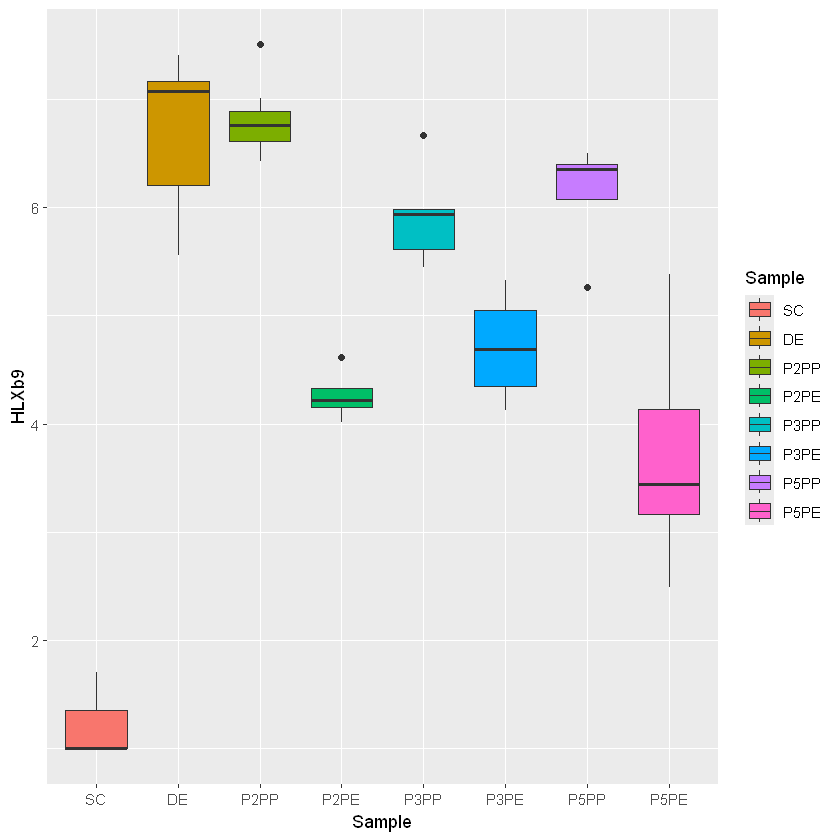

In [16]:

x$Sample = factor(x$Sample)
x$Sample
print("-----------------------------------------------------------------------------------------------------------------------------")

as.numeric(x$Sample)
print("-----------------------------------------------------------------------------------------------------------------------------")

x$Sample <- factor(x$Sample, levels = unique(x$Sample))
as.numeric(x$Sample)
ggplot(x, aes(Sample, HLXb9, fill = Sample)) + geom_boxplot()


13. saving our plot in a pdf

In [13]:
pdf("C:/Users/abolf/desktop/jupyter train/intro bioinf sharifi practical/ HLXb9 expression boxplot.pdf")
ggplot(x, aes(Sample, HLXb9, fill = Sample)) + geom_boxplot()
dev.off()

png 
  2